In [44]:
import sklearn

In [45]:
from sklearn.datasets import load_digits
load_digits()['data'][100]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

In [46]:
load_digits()['target'][100]

4

In [47]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X,y):
        pass
        
    # 입력값으로 들어오는 X 데이터셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

# 사이킷런의 내장 데이터셋인 load_digits()를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)
print('레이블 테스트 세트 크기: ', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는: {:.3f}'.format(accuracy_score(y_test, fakepred)))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)
레이블 테스트 세트 크기:  (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는: 0.900


In [48]:
# sklearn.metrics.confusion_matrix
from sklearn.metrics import confusion_matrix

result = confusion_matrix(y_test, fakepred)
result


array([[405,   0],
       [ 45,   0]], dtype=int64)

In [49]:
tn, fp, fn, tp = result.ravel()

In [50]:
tn, fp, fn, tp 

(405, 0, 45, 0)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy_score(y_test, fakepred)

0.9

In [52]:
precision_score(y_test, fakepred)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [53]:
recall_score(y_test, fakepred)

0.0

In [54]:
import pandas as pd

titanic_train_df = pd.read_csv('./datasets/titanic_train.csv')
titanic_test_df = pd.read_csv('./datasets/titanic_test.csv')
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
mean = titanic_train_df['Age'].mean()

titanic_train_df['Age'] = titanic_train_df['Age'].fillna(mean)
titanic_test_df['Age'] = titanic_test_df['Age'].fillna(mean)

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic_train_df['Sex'])

titanic_train_df['Sex'] = le.transform(titanic_train_df['Sex'])
titanic_test_df['Sex'] = le.transform(titanic_test_df['Sex'])

In [57]:
gender_submission = pd.read_csv('./datasets/titanic_gender_submission.csv')
X_train_df = titanic_train_df[['Pclass', 'Sex','Age']]
y_train = titanic_train_df['Survived']

X_test_df = titanic_test_df[['Pclass', 'Sex','Age']]
y_test = gender_submission['Survived']

In [58]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()

clf = LogisticRegression(random_state=0)
clf.fit(X_train_df, y_train)

pred = clf.predict(X_test_df)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [60]:
accuracy_score(y_test, pred)

0.9569377990430622

In [61]:
precision_score(y_test, pred)

0.935064935064935

In [62]:
recall_score(y_test, pred)

0.9473684210526315

In [63]:
1/((1/0.935064935064935 +1 / 0.9473684210526315)/2)

0.9411764705882353

In [64]:
f1_score(y_test, pred)

0.9411764705882353

In [65]:
pred_proba = clf.predict_proba(X_test_df)

In [66]:
pred_proba[:,1]

array([0.07758662, 0.40917757, 0.09613191, 0.09719739, 0.61192902,
       0.14174069, 0.54788624, 0.25804812, 0.64269377, 0.11595667,
       0.08967637, 0.36016139, 0.93714081, 0.09330995, 0.87124971,
       0.821906  , 0.20548738, 0.11595667, 0.57220891, 0.42518038,
       0.29507337, 0.16296258, 0.92283159, 0.56171633, 0.86751255,
       0.04807468, 0.93905191, 0.11099111, 0.39888698, 0.08967637,
       0.13634077, 0.27084991, 0.52333267, 0.55033799, 0.48798348,
       0.12466134, 0.55033799, 0.61971526, 0.10312852, 0.08967637,
       0.06762853, 0.49045797, 0.0635943 , 0.79114548, 0.8784547 ,
       0.10312852, 0.36778013, 0.08967637, 0.81520624, 0.4986658 ,
       0.53727952, 0.2517972 , 0.84036705, 0.92672094, 0.23543308,
       0.15852287, 0.07641708, 0.10312852, 0.08967637, 0.90670777,
       0.13014896, 0.22207604, 0.12646814, 0.61192902, 0.62514043,
       0.792777  , 0.64269377, 0.35261246, 0.47976428, 0.81520624,
       0.59618749, 0.11595667, 0.55602515, 0.50032308, 0.90945

In [67]:
from sklearn.preprocessing import Binarizer

thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율: {recall:.4f}')

In [68]:
def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f'임계값 : {custom_threshold}')
        get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값 : 0.4
오차행렬
[[237  29]
 [  0 152]]
정확도:0.9306, 정밀도:0.8398, 재현율: 1.0000
임계값 : 0.45
오차행렬
[[242  24]
 [  3 149]]
정확도:0.9354, 정밀도:0.8613, 재현율: 0.9803
임계값 : 0.5
오차행렬
[[256  10]
 [  8 144]]
정확도:0.9569, 정밀도:0.9351, 재현율: 0.9474
임계값 : 0.55
오차행렬
[[262   4]
 [ 13 139]]
정확도:0.9593, 정밀도:0.9720, 재현율: 0.9145
임계값 : 0.6
오차행렬
[[264   2]
 [ 44 108]]
정확도:0.8900, 정밀도:0.9818, 재현율: 0.7105


In [69]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

In [70]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1score = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율: {recall:.4f} , f1 : {f1score:.4f}')

In [71]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
thresholds = [0.4,0.45,0.50,0.55,0.60]

In [72]:
# sklearn.metrics.precision_recall_curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:,1])

In [73]:
precision

array([0.36363636, 0.36450839, 0.36538462, 0.36626506, 0.36714976,
       0.36803874, 0.36982968, 0.37163814, 0.37254902, 0.37346437,
       0.37530864, 0.37623762, 0.37717122, 0.37905237, 0.38      ,
       0.38383838, 0.3857868 , 0.44186047, 0.4457478 , 0.44705882,
       0.45103858, 0.45238095, 0.4592145 , 0.46060606, 0.46200608,
       0.46769231, 0.47648903, 0.48717949, 0.49190939, 0.49350649,
       0.49511401, 0.50165017, 0.51877133, 0.52413793, 0.52595156,
       0.53333333, 0.53900709, 0.54092527, 0.54285714, 0.54480287,
       0.54676259, 0.55072464, 0.55272727, 0.55474453, 0.55677656,
       0.55882353, 0.56088561, 0.56296296, 0.56716418, 0.56928839,
       0.57358491, 0.57794677, 0.58461538, 0.58687259, 0.58914729,
       0.59143969, 0.59375   , 0.59607843, 0.5984252 , 0.60079051,
       0.6031746 , 0.60557769, 0.61044177, 0.62295082, 0.63333333,
       0.63598326, 0.64135021, 0.64680851, 0.65236052, 0.65517241,
       0.66666667, 0.67555556, 0.68468468, 0.69090909, 0.69724

In [74]:
recall

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [75]:
thresholds

array([0.03451273, 0.04807468, 0.0597853 , 0.0635943 , 0.06458132,
       0.06558258, 0.06762853, 0.06867356, 0.07300488, 0.07412639,
       0.07641708, 0.07758662, 0.08119421, 0.08243034, 0.08368358,
       0.0862421 , 0.08967637, 0.09157253, 0.09330995, 0.09434741,
       0.09613191, 0.09719739, 0.09865099, 0.09902989, 0.10012393,
       0.10312852, 0.10621264, 0.10937774, 0.11099111, 0.11141154,
       0.11262527, 0.11595667, 0.11937336, 0.12466134, 0.12646814,
       0.13014896, 0.13634077, 0.1397506 , 0.14026278, 0.14174069,
       0.14579181, 0.1483899 , 0.15204802, 0.15852287, 0.16130499,
       0.16296258, 0.16580726, 0.17040966, 0.17214161, 0.175113  ,
       0.17688256, 0.179918  , 0.18172542, 0.18983547, 0.20016618,
       0.2030307 , 0.20345706, 0.20548738, 0.20570643, 0.21091273,
       0.21997518, 0.22207604, 0.23365525, 0.23543308, 0.23738398,
       0.23960002, 0.24564756, 0.2517972 , 0.25571883, 0.25804812,
       0.26439939, 0.27084991, 0.27739847, 0.28156878, 0.28404

In [77]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


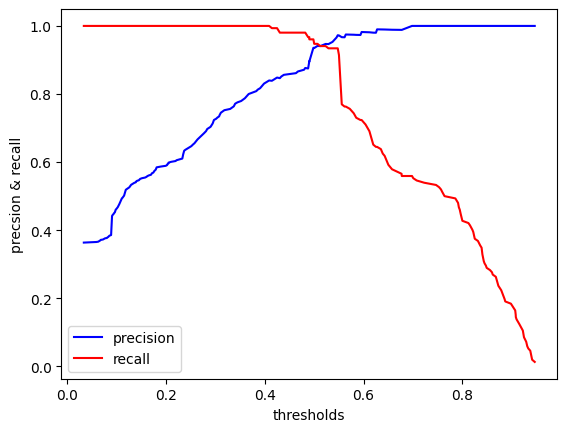

In [78]:
# matplotlib.pyplot.plot
import matplotlib.pyplot as plt

plt.plot(thresholds , precision[:-1] , c='blue' , label="precision")
plt.plot(thresholds , recall[:-1] , c='red', label="recall")
plt.xlabel("thresholds")
plt.ylabel("precsion & recall")
plt.legend()
plt.show()

In [82]:
# sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test,pred_proba[:,1])

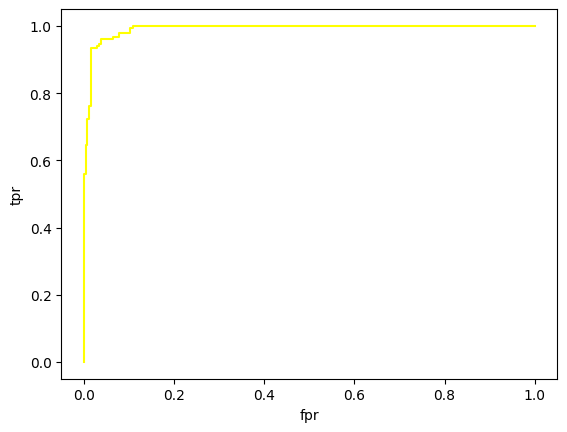

In [89]:
len(fprs),len(thresholds)

import matplotlib.pyplot as plt

plt.plot(fprs , tprs, color = 'yellow')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

In [88]:
# sklearn.metrics.roc_auc_score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,pred_proba[:,1])

0.9916402849228334